# Import libraries

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim

# Dataset


## Download dataset

In [2]:
!wget --output-document=Apple\ Financial\ Report.csv "https://drive.google.com/uc?export=download&id=1m0fbb8VjaCU1Ye9N_hs85z7HWNk0GA9s"

--2020-04-20 05:34:04--  https://drive.google.com/uc?export=download&id=1m0fbb8VjaCU1Ye9N_hs85z7HWNk0GA9s
Resolving drive.google.com (drive.google.com)... 173.194.79.113, 173.194.79.101, 173.194.79.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g84vr1q8dtloskmp6nt8v8oms3i26lqf/1587360825000/08674965411100473451/*/1m0fbb8VjaCU1Ye9N_hs85z7HWNk0GA9s?e=download [following]
--2020-04-20 05:34:05--  https://doc-0k-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g84vr1q8dtloskmp6nt8v8oms3i26lqf/1587360825000/08674965411100473451/*/1m0fbb8VjaCU1Ye9N_hs85z7HWNk0GA9s?e=download
Resolving doc-0k-9c-docs.googleusercontent.com (doc-0k-9c-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to doc-0k-9c-docs.googleusercontent.com (doc-0

## Load dataset

In [0]:
def load_unicef_data():
    
    fname = 'Apple Financial Report.csv'

    # Uses pandas to help with string-NaN-numeric data.
    data = pd.read_csv(fname, na_values='_', encoding='latin1')
    # Strip countries title from feature names.
    features = data.axes[1][1:]
    # Separate country names from feature values.
    quarters = data.values[:,0]
    values = data.values[:,1:]
    # Convert to numpy matrix for real.
    values = np.asmatrix(values,dtype='float32')

    # Modify NaN values (missing values).
    mean_vals = np.nanmean(values, axis=0)
    inds = np.where(np.isnan(values))
    values[inds] = np.take(mean_vals, inds[1])
    return (quarters, features, values)

In [0]:
(quarters, features, values) = load_unicef_data()

In [5]:
print(quarters)

['2-Q 2005' '3-Q 2005' '4-Q 2005' '1-Q 2006' '2-Q 2006' '3-Q 2006'
 '4-Q 2006' '1-Q 2007' '2-Q 2007' '3-Q 2007' '4-Q 2007' '1-Q 2008'
 '2-Q 2008' '3-Q 2008' '4-Q 2008' '1-Q 2009' '2-Q 2009' '3-Q 2009'
 '4-Q 2009' '1-Q 2010' '2-Q 2010' '3-Q 2010' '4-Q 2010' '1-Q 2011'
 '2-Q 2011' '3-Q 2011' '4-Q 2011' '1-Q 2012' '2-Q 2012' '3-Q 2012'
 '4-Q 2012' '1-Q 2013' '2-Q 2013' '3-Q 2013' '4-Q 2013' '1-Q 2014'
 '2-Q 2014' '3-Q 2014' '4-Q 2014' '1-Q 2015' '2-Q 2015' '3-Q 2015'
 '4-Q 2015' '1-Q 2016' '2-Q 2016' '3-Q 2016' '4-Q 2016' '1-Q 2017'
 '2-Q 2017' '3-Q 2017' '4-Q 2017' '1-Q 2018' '2-Q 2018' '3-Q 2018'
 '4-Q 2018' '1-Q 2019' '2-Q 2019' '3-Q 2019' '4-Q 2019' '1-Q 2020']


In [6]:
print(features)

Index(['Net Income', 'Net Sales /Revenue', 'Cost of Sales',
       'Operating Expenses', 'Operating Income', 'Net Sales By iPhone',
       'Net Sales By iPad', 'Net Sales By Mac', 'Net Sales By Service',
       'Net Sales By Wearables, Home and Accessories \n',
       'If new product comes out (iPhone)', 'If new product comes out (iPad)',
       'If new product comes out (Mac)',
       'If new product comes out (Wearables, Home and Accessories)',
       'New Revolutional technique'],
      dtype='object')


In [7]:
print(values)

[[2.9000000e+02 3.2430000e+03 2.2750000e+03 2.8410000e+03 4.0200000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.3701379e+03
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00]
 [3.1900000e+02 3.5200000e+03 2.4760000e+03 3.0940000e+03 4.2600000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.3701379e+03
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.2400000e+02 3.6780000e+03 2.6440000e+03 3.2660000e+03 4.1200000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.3701379e+03
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [5.6500000e+02 5.7490000e+03 4.1850000e+03 4.9990000e+03 7.5000000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.3701379e+03
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [4.1000000e+02 4.3590000e+03 3.0620000e+03 3.8300000e+03 5.2900000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.

## Seperate dataset to train set and test set

In [0]:
targets = values[:,0]
x = values[:,2:]

N_TRAIN = 50
q_train = quarters[0:N_TRAIN]
q_test = quarters[N_TRAIN:]
x_train = torch.from_numpy(x[0:N_TRAIN,:]).view(-1, 1, 13)
x_test = torch.from_numpy(x[N_TRAIN:,:]).view(-1, 1, 13)
t_train = torch.from_numpy(targets[0:N_TRAIN])
t_test = targets[N_TRAIN:]

In [9]:
print(x_train.size())
print(t_train.reshape(50))
print(t_train.size())

torch.Size([50, 1, 13])
tensor([  290.,   319.,   424.,   565.,   410.,   472.,   542.,  1004.,   770.,
          818.,   903.,  1581.,  1045.,  1072.,  2421.,  2255.,  1620.,  1828.,
         2532.,  3378.,  3074.,  3253.,  4308.,  6004.,  5987.,  7308.,  6623.,
        13064., 11622.,  8824.,  8223., 13078.,  9547.,  6900.,  7512., 13072.,
        10223.,  7748.,  8467., 18024., 13569., 10677., 11124., 18361., 10516.,
         7796.,  9014., 17891., 11029.,  8717.])
torch.Size([50, 1])


# Create model

In [0]:
class SimpleRNN(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size=13,
                          hidden_size=hidden_size,
                          num_layers=1)
        self.linear = nn.Linear(hidden_size, 1)
 
    def forward(self, seq, hc=None):
        tmp, hc = self.rnn(seq, hc)
        out = self.linear(tmp)
        return out, hc

In [0]:
hidden_size = 256
learning_rate = 0.2

model = SimpleRNN(hidden_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), learning_rate)

In [12]:
print(model)

SimpleRNN(
  (rnn): RNN(13, 256)
  (linear): Linear(in_features=256, out_features=1, bias=True)
)


# Train the model

In [29]:
epochs = 50000
for epoch in range(epochs):
    optimizer.zero_grad()
    output, _ = model(x_train)
    loss = criterion(output.view(-1), t_train.view(-1))
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch {}: loss {}".format(epoch, loss.item()))
    if loss.item() <= 41000:
      print("Epoch {}: loss {}".format(epoch, loss.item()))
      break

Epoch 0: loss 66610252.0
Epoch 100: loss 29998930.0
Epoch 200: loss 18514388.0
Epoch 300: loss 13685823.0
Epoch 400: loss 10738693.0
Epoch 500: loss 8785328.0
Epoch 600: loss 7461371.0
Epoch 700: loss 6536153.0
Epoch 800: loss 5864942.5
Epoch 900: loss 5361081.5
Epoch 1000: loss 4972364.0
Epoch 1100: loss 4665368.5
Epoch 1200: loss 4416981.0
Epoch 1300: loss 4210394.0
Epoch 1400: loss 4033188.75
Epoch 1500: loss 3876303.25
Epoch 1600: loss 3733323.75
Epoch 1700: loss 3599866.25
Epoch 1800: loss 3473071.75
Epoch 1900: loss 3351161.5
Epoch 2000: loss 3233088.25
Epoch 2100: loss 3118273.5
Epoch 2200: loss 3006428.25
Epoch 2300: loss 2897435.5
Epoch 2400: loss 2791267.0
Epoch 2500: loss 2687948.25
Epoch 2600: loss 2587521.5
Epoch 2700: loss 2490034.0
Epoch 2800: loss 2395534.0
Epoch 2900: loss 2304058.0
Epoch 3000: loss 2215632.75
Epoch 3100: loss 2130268.75
Epoch 3200: loss 2047967.5
Epoch 3300: loss 1968713.125
Epoch 3400: loss 1892476.5
Epoch 3500: loss 1819215.375
Epoch 3600: loss 1748

KeyboardInterrupt: ignored

In [0]:
for name, param in model.named_parameters(): 
  if param.requires_grad: 
    print (name, param.data)

# Make predictions

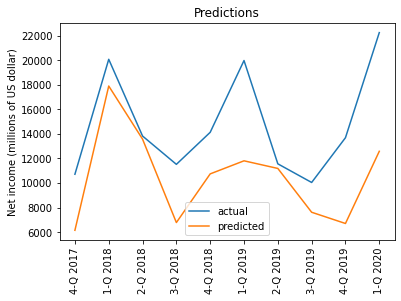

In [30]:
predictions = []
input = x_test[0, :, :]  # choose the first time step as input
hidden_prev = None
for i in range(x_test.shape[0]):
    input = x_test[i, :, :]
    input = input.view(1, 1, 13)
    pred, hidden_prev = model(input, hidden_prev)
    predictions.append(pred.data.numpy()[0, 0, 0])


plt.title('Predictions')

plt.plot(q_test, t_test, label='actual')
plt.ylabel("Net income (millions of US dollar)")
plt.plot(q_test, predictions, label='predicted')
plt.xticks(rotation=90)
plt.legend()

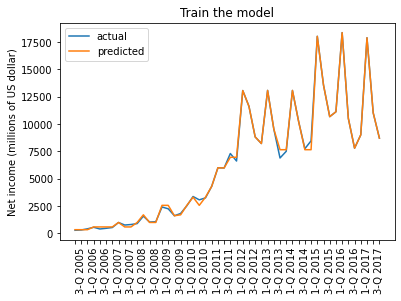

In [31]:
predictions = []
input = x_train[-1, :, :]  # choose the first time step as input
hidden_prev = None
for i in range(x_train.shape[0]):
    input = x_train[i, :, :]
    input = input.view(1, 1, 13)
    pred, hidden_prev = model(input, hidden_prev)
    predictions.append(pred.data.numpy()[0, 0, 0])



plt.title('Train the model')
plt.ylabel("Net income (millions of US dollar)")
plt.plot(q_train, t_train, label='actual')
plt.plot(q_train, predictions, label='predicted')
plt.xticks(rotation=90)
ax = plt.gca()
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
ax.legend()